## SMS Spam Classifier

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('spam.csv',encoding='latin')
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4049,ham,Ok ok take care. I can understand.,NaN,NaN,NaN
265,ham,Same. Wana plan a trip sometme then,NaN,NaN,NaN
4324,ham,Am only searching for good dual sim mobile pa.,NaN,NaN,NaN
2416,ham,"Could you not read me, my Love ? I answered you",NaN,NaN,NaN
356,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

### Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 cols
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
data.sample(5)

,v1,v2
3033,ham,Get ready for &lt;#&gt; inches of pleasure...
4755,ham,Don't make life too stressfull.. Always find t...
3076,ham,There is no sense in my foot and penis.
5058,spam,Free video camera phones with Half Price line ...
4830,ham,Po de :-):):-):-):-). No need job aha.


In [7]:
# Renaming cols
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
data.sample(5)

,target,text
4924,ham,Ok... Let u noe when i leave my house.
1655,ham,At 7 we will go ok na.
428,ham,7 at esplanade.. Do Ì_ mind giving me a lift c...
3652,ham,It has issues right now. Ill fix for her by to...
3117,ham,R u saying i should re order the slippers cos ...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['target']=encoder.fit_transform(data['target'])

In [10]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Note:
    0 ----> ham
    1 -----> spam

In [11]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
data.duplicated().sum()

403

In [13]:
# remove duplicate
data.drop_duplicates(keep='first',inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(5169, 2)

### EDA

In [16]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ariji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
data['num_characters']=data['text'].apply(len)

In [19]:
data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
data['num_sentence']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
data.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
data[['num_characters','num_words','num_sentence']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.453279,13.324793,1.0,9.0,15.0,26.0,220.0
num_sentence,5169.0,1.947185,1.362406,1.0,1.0,1.0,2.0,28.0


In [23]:
# for ham message
data[data['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
# for spam messages
data[data['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sentence')

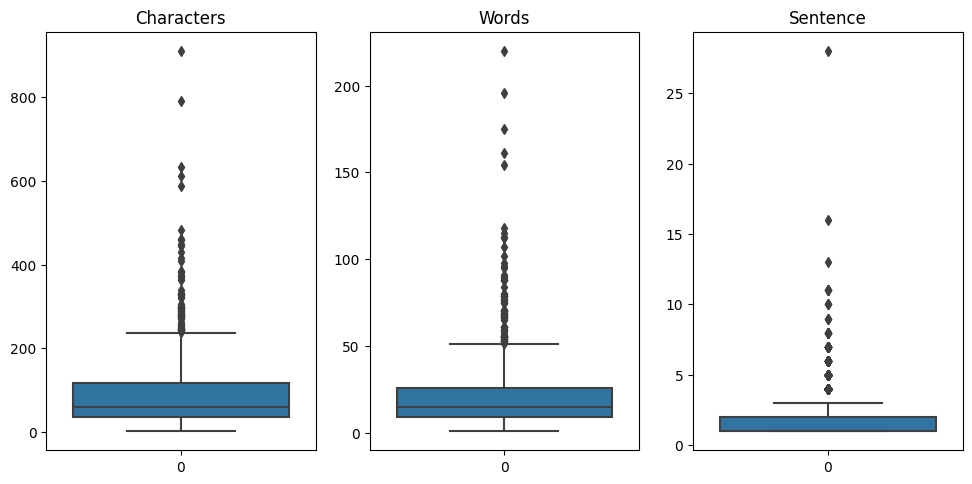

In [26]:
plt.figure(figsize=(16,25))
plt.subplot(4,4,1)
sns.boxplot(data['num_characters'])
plt.title('Characters')
plt.subplot(4,4,2)
sns.boxplot(data['num_words'])
plt.title('Words')
plt.subplot(4,4,3)
sns.boxplot(data['num_sentence'])
plt.title('Sentence')

C:\Users\ariji\AppData\Local\Temp\ipykernel_3316\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

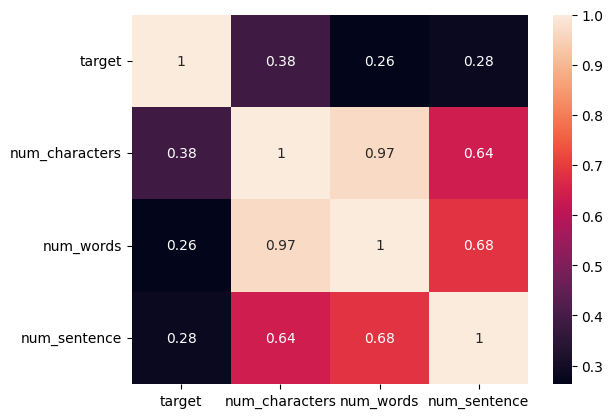

In [27]:
sns.heatmap(data.corr(),annot=True)

### Text Preprocessing

Steps:

        1. Convert to lowercase
        2. Tokenization
        3. Removing special characters
        4. REmoving stop words and punctuation
        5. Stemming

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [31]:
def convert_text(text):
    text=text.lower() # lowercase
    text=nltk.word_tokenize(text) # tokenize
    # Removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Removing stopwords and punctuation
    y1=[]
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y1.append(i)
    
    result=[]
    for i in y1:
        result.append(ps.stem(i))
    return " ".join(result)
    

In [32]:
convert_text('i loved the youtube lectures on machine learning. How about you?')

'love youtub lectur machin learn'

In [33]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [34]:
convert_text(data['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [35]:
data['transformed_text']=data['text'].apply(convert_text)

In [36]:
data.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

9939

In [39]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [40]:
ham_corpus=[]
for msg in data[data['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

### Model Building

In [42]:
# Converting text into vectors usig tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [43]:
x=tfidf.fit_transform(data['transformed_text']).toarray()

In [44]:
x.shape

(5169, 6708)

In [45]:
y=data['target'].values

In [46]:
y.shape

(5169,)

In [47]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [49]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [50]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test,y_pred))
print('precision_score : ',precision_score(y_test,y_pred))

accuracy_score :  0.8646034816247582
precision_score :  0.5


In [51]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test,y_pred))
print('precision_score : ',precision_score(y_test,y_pred))

accuracy_score :  0.9555125725338491
precision_score :  1.0


In [52]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test,y_pred))
print('precision_score : ',precision_score(y_test,y_pred))

accuracy_score :  0.9690522243713733
precision_score :  0.9821428571428571


### Evaluation

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [54]:
classifier=[
    ['LogisticRegression : ',LogisticRegression(solver='liblinear',penalty='l1')],
    ['ExtraTreesClassifier : ',ExtraTreesClassifier()],
    ['Decision Tree : ',DecisionTreeClassifier(max_depth=5)],
    ['RandomForestClassifier : ',RandomForestClassifier(n_estimators=50,random_state=2)],
    ['Naive Bayes : ',MultinomialNB()],
    ['KNeighbours : ',KNeighborsClassifier()],
    ['SVM : ',SVC(kernel='sigmoid',gamma=1.0)],
    ['AdaBoostClassifier : ',AdaBoostClassifier(n_estimators=50,random_state=2)],
    ['GradientBoostingClassifier : ',GradientBoostingClassifier()],
    ['XGBClassifier : ',XGBClassifier()]
]
for name,clf in classifier:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(f'{name}:\n Accuracy Score : {accuracy_score(y_test,y_pred)} \tPrecision Score : {precision_score(y_test,y_pred)}')

LogisticRegression : :
 Accuracy Score : 0.9535783365570599 	Precision Score : 0.9791666666666666
ExtraTreesClassifier : :
 Accuracy Score : 0.9700193423597679 	Precision Score : 1.0
Decision Tree : :
 Accuracy Score : 0.9352030947775629 	Precision Score : 0.8762886597938144
RandomForestClassifier : :
 Accuracy Score : 0.9642166344294004 	Precision Score : 1.0
Naive Bayes : :
 Accuracy Score : 0.9555125725338491 	Precision Score : 1.0
KNeighbours : :
 Accuracy Score : 0.8945841392649904 	Precision Score : 1.0
SVM : :
 Accuracy Score : 0.971953578336557 	Precision Score : 1.0
AdaBoostClassifier : :
 Accuracy Score : 0.9574468085106383 	Precision Score : 0.9528301886792453
GradientBoostingClassifier : :
 Accuracy Score : 0.9574468085106383 	Precision Score : 0.98
XGBClassifier : :
 Accuracy Score : 0.9671179883945842 	Precision Score : 0.9649122807017544


In [55]:
from sklearn.ensemble import VotingClassifier
svm=SVC(kernel='sigmoid',gamma=1.0)
etc=ExtraTreesClassifier()
rnf=RandomForestClassifier(n_estimators=50,random_state=2)
clf=VotingClassifier(estimators=[('svm',svm),('ExtraTreesClassifier',etc),('RandomForestClassifier',rnf)],voting='hard')
clf.fit(x_train,y_train)

VotingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                             ('ExtraTreesClassifier', ExtraTreesClassifier()),
                             ('RandomForestClassifier',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))])

In [56]:
y_pred=clf.predict(x_test)
print(f'Accuracy score : {accuracy_score(y_test,y_pred)}')
print(f'Precision score : {precision_score(y_test,y_pred)}')

Accuracy score : 0.9680851063829787
Precision score : 1.0


In [57]:
estimators=[('svm',svm),('ExtraTreesClassifier',etc),('RandomForestClassifier',rnf)]
final_estimator=ExtraTreesClassifier()
from sklearn.ensemble import StackingClassifier
stack=StackingClassifier(estimators=estimators,final_estimator=final_estimator)
stack.fit(x_train,y_train)

StackingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                               ('ExtraTreesClassifier', ExtraTreesClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2))],
                   final_estimator=ExtraTreesClassifier())

In [58]:
y_pred=stack.predict(x_test)
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')
print(f'Precision Score : {precision_score(y_test,y_pred)}')

Accuracy Score : 0.9777562862669246
Precision Score : 0.9606299212598425


In [60]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [ ]:
pickle.dump(mnb,open('model.pkl','wb'))